1. Find P(K=0), P(K=1), P(a=1|K=0), P(b=1|K=0), P(c=1|K=0), P(a=1|K=1), P(b=1|K=1), P(c=1|K=1).

In [70]:
import math
K_0 = 4
K = 8
P_0 = K_0/K
print('The probability of P(K=0) is', P_0)



The probability of P(K=0) is 0.5


In [71]:
K_1 = 4
P_1 = K_1/K
print('The probability of P(K=1) is', P_1)

The probability of P(K=1) is 0.5


1. From the definition, the conditional probability P(B|A) is easily obtained by dividing by P(A):
   ####  P(B|A) = P(A and B)/ P(A)



In [ ]:
P(a=1|K=0) = 2/4 = 1/2

In [ ]:
P(b=1|K=0) = 2/4 = 1/2

In [ ]:
P(c=1|K=0) = 3/4 

In [ ]:
P(a=1|K=1) = 2/4 = 1/2

In [ ]:
P(b=1|K=1) = 1/4

In [ ]:
P(c=1|K=1) = 2/4 = 1/2

#### b.According to the naive Bayes classifier, what is P(K = 1|a = 1 and b = 1 and c = 0) 

In [ ]:
P(K = 1|a = 1 and b = 1 and c = 0) = P(K = 1 and a = 1 and b = 1 and c = 0)/P(a = 1 and b = 1 and c = 0)
= P(K= 1)*P(a = 1|K = 1)*P(b = 1|K = 1)*P(c = 0|K = 1)/ P(a = 1 and b = 1 and c = 0 and K = 1) + P(a = 1 and b = 1 and c = 0 and K = 0)
P(K=1) = 1/2
P(a = 1|K = 1) = 1/2
P(b = 1|K = 1) = 1/4
P(c = 0|K = 1) = 1/2
P(a = 1 and b = 1 and c = 0 and K = 1) = P(K=1)* P(P(a = 1|K = 1))* P(b = 1|K = 1) * P(c = 0|K = 1)
P(a = 1 and b = 1 and c = 0 and K = 1) = (1/2 * 1/2 * 1/2 * 1/4) = 1/32

P(a = 1 and b = 1 and c = 0 and K = 0) = P(K=0)* P(P(a = 1|K = 0))* P(b = 1|K = 0) * P(c = 0|K = 0)
P(a = 1 and b = 1 and c = 0 and K = 0) = (1/2 * 1/2 * 1/2 * 1/4) = 1/32

So, P(K = 1|a = 1 and b = 1 and c = 0) = (1/2 * 1/2 * 1/4 * 1/2) / (1/32 + 1/32) = (1/32)/ (2/32) = 1/2 = 0.5 Answer.


### c.	According to the naive Bayes classifier, what is P(K = 0|a = 1 and b = 1)

In [ ]:
P(K = 0|a = 1 and b = 1) = P(K = 0 and a = 1 and b = 1)/P(a = 1 and b = 1)
= P(K= 0) * P(a = 1|K = 0)* P(b = 1|K = 0)/P(a = 1 and b = 1 and K = 1) + P(a = 1 and b = 1 and K = 0)
P(K= 0) = 1/2
P(a = 1|K = 0)= 1/2
P(b = 1|K = 0) = 1/2
P(a = 1 and b = 1 and K = 1) = P(K=1)* P(P(a = 1|K = 1))* P(b = 1|K = 1)
P(a = 1 and b = 1 and K = 1) = 1/2 * 1/2 * 1/4 = 1/16


P(a = 1 and b = 1 and K = 0) = P(K=0)* P(P(a = 1|K = 0))* P(b = 1|K = 0)
P(a = 1 and b = 1 and K = 0) = 1/2 * 1/2 * 1/2 = 1/8


According to the naive Bayes classifier, P(K = 0|a = 1 and b = 1) = (1/2 * 1/2 * 1/2) / (1/16 * 1/8) = (1/8) / (3/16) = 2/3 = 0.6667 Answer.

### Practice:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, make_scorer
from sklearn.metrics import roc_curve


In [49]:
df = pd.read_csv('FlightDelaysR.csv')   #loading csv file using pandas
df.head(5)

,Unnamed: 0,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FlightStatus
0,0,15.0,OH,1455,JFK,184,01/01/2004,5935,BWI,0,THU,1,N940CA,0
1,1,16.0,DH,1640,JFK,213,01/01/2004,6155,DCA,0,THU,1,N405FJ,0
2,2,12.0,DH,1245,LGA,229,01/01/2004,7208,IAD,0,THU,1,N695BR,0
3,3,17.0,DH,1709,LGA,229,01/01/2004,7215,IAD,0,THU,1,N662BR,0
4,4,10.0,DH,1035,LGA,229,01/01/2004,7792,IAD,0,THU,1,N698BR,0


### 2.	Split data into input and output (outcome) (10 points)
a.	For input features: 'DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER'
b.	For outcome: ‘FlightStatus’


In [50]:
input_data = pd.DataFrame(df, columns=['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER'])
input_data

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER
0,THU,15.0,BWI,JFK,OH
1,THU,16.0,DCA,JFK,DH
2,THU,12.0,IAD,LGA,DH
3,THU,17.0,IAD,LGA,DH
4,THU,10.0,IAD,LGA,DH
...,...,...,...,...,...
2196,SAT,6.0,DCA,EWR,RU
2197,SAT,17.0,IAD,EWR,RU
2198,SAT,16.0,DCA,EWR,RU
2199,SAT,14.0,DCA,EWR,RU


In [51]:
output_data = pd.DataFrame( df, columns = ['FlightStatus'])
output_data

,FlightStatus
0,0
1,0
2,0
3,0
4,0
...,...
2196,0
2197,0
2198,0
2199,0


In [52]:
#3.	Make dummy/indicator variables/features using pd.get_dummies
X = pd.get_dummies(input_data, columns = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER'], drop_first = True)
X.head()


,DAY_WEEK_MON,DAY_WEEK_SAT,DAY_WEEK_SUN,DAY_WEEK_THU,DAY_WEEK_TUE,DAY_WEEK_WEN,CRS_DEP_TIME_7.0,CRS_DEP_TIME_8.0,CRS_DEP_TIME_9.0,CRS_DEP_TIME_10.0,...,ORIGIN_IAD,DEST_JFK,DEST_LGA,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0


### 4.Split data into training and test data set (use 30% for test). 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, output_data, test_size = 0.3 , random_state = 1)  

### 5.Use BernoullilNB in sckitlearn and do classification, use class_prior [0.5, 0.5], alpha=1

In [17]:
bnb = BernoulliNB(alpha = 1.0, class_prior = [0.5, 0.5]) 



In [18]:
bnb.fit(X_train, y_train)

/Users/sukritimishra/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=True)

In [21]:
y_predicted = bnb.predict(X_test)
y_predicted

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

### 6.	Draw confusion matrix. 

In [22]:
conf_matrix = classification_report(y_test, y_predicted)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.87      0.53      0.66       537
           1       0.25      0.66      0.36       124

    accuracy                           0.56       661
   macro avg       0.56      0.60      0.51       661
weighted avg       0.75      0.56      0.60       661



In [24]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_predicted), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix

,Predict[0],Predict[1]
True[0],285,252
True[1],42,82


In [29]:
print("The accuracy score when prior probabilites are [0.5, 0.5] is", accuracy_score(y_test, y_predicted) * 100)

The accuracy score when prior probabilites are [0.5, 0.5] is 55.52193645990923


### 7.	Draw ROC curve and cumulative gain chart

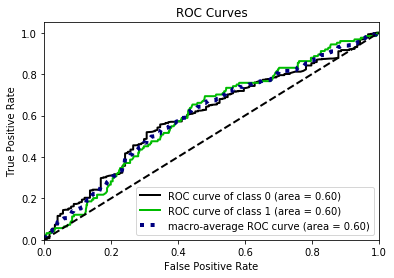

In [30]:
skplt.metrics.plot_roc(y_test, bnb.predict_proba(X_test), plot_micro = False)
plt.show()

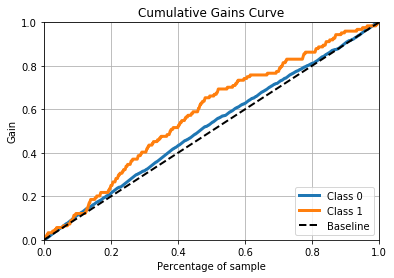

In [32]:
skplt.metrics.plot_cumulative_gain(y_test, bnb.predict_proba(X_test))
plt.show()

### 8.	Change a parameter (1) prior [0.9, 0.1]  

In [86]:
bnb_1 = BernoulliNB( alpha = 1.0, class_prior = [0.9, 0.1])
bnb_1.fit(X_train, y_train)

/Users/sukritimishra/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=True)

In [87]:
y_predicted_1 = bnb_1.predict(X_test)
#y_predicted_1

In [88]:
conf_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_predicted_1), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_1

,Predict[0],Predict[1]
True[0],526,11
True[1],120,4


In [89]:
print(classification_report(y_test, y_predicted_1))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89       537
           1       0.27      0.03      0.06       124

    accuracy                           0.80       661
   macro avg       0.54      0.51      0.47       661
weighted avg       0.71      0.80      0.73       661



In [90]:
print("The accuracy score when prior probabilites are [0.9, 0.1] is", accuracy_score(y_test, y_predicted_1) * 100)

The accuracy score when prior probabilites are [0.9, 0.1] is 80.18154311649016


In [91]:
print("The precision score when prior probabilites are [0.9, 0.1] is", precision_score(y_test, y_predicted_1) * 100)

The precision score when prior probabilites are [0.9, 0.1] is 26.666666666666668


In [92]:
print("The f1 score when prior probabilites are [0.9, 0.1] is", f1_score(y_test, y_predicted_1) * 100)

The f1 score when prior probabilites are [0.9, 0.1] is 5.755395683453237


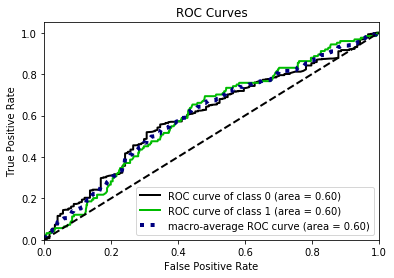

In [59]:
skplt.metrics.plot_roc(y_test, bnb_1.predict_proba(X_test), plot_micro = False)
plt.show()

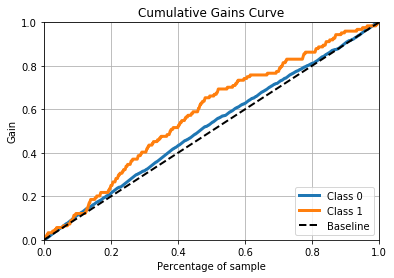

In [60]:
skplt.metrics.plot_cumulative_gain(y_test, bnb_1.predict_proba(X_test))
plt.show()

### 8.	Change a parameter (2) [0.1, 0.9]. Explain parameter dependency. (10 points)

In [78]:
bnb_2 = BernoulliNB( alpha = 1.0, class_prior = [0.1, 0.9])
bnb_2.fit(X_train, y_train)

/Users/sukritimishra/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=True)

In [79]:
y_predicted_2 = bnb_2.predict(X_test)
#y_predicted_2

In [80]:
conf_matrix_2 = pd.DataFrame(confusion_matrix(y_test, y_predicted_2), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_2

,Predict[0],Predict[1]
True[0],80,457
True[1],9,115


In [81]:
print(classification_report(y_test, y_predicted_2))


              precision    recall  f1-score   support

           0       0.90      0.15      0.26       537
           1       0.20      0.93      0.33       124

    accuracy                           0.30       661
   macro avg       0.55      0.54      0.29       661
weighted avg       0.77      0.30      0.27       661



In [82]:
print("The accuracy score when prior probabilites are [0.1, 0.9] is", accuracy_score(y_test, y_predicted_2) * 100)

The accuracy score when prior probabilites are [0.1, 0.9] is 29.500756429652043


In [83]:
print("The precision score when prior probabilites are [0.1, 0.9] is", accuracy_score(y_test, y_predicted_2) * 100)

The precision score when prior probabilites are [0.1, 0.9] is 29.500756429652043


In [85]:
print("The f1 score when prior probabilites are [0.1, 0.9] is", f1_score(y_test, y_predicted_2) * 100)

The f1 score when prior probabilites are [0.1, 0.9] is 33.04597701149425


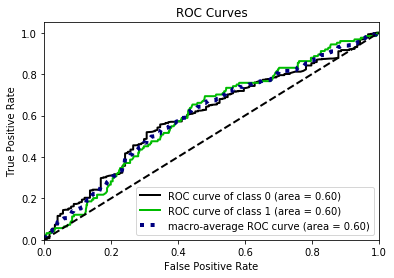

In [65]:
skplt.metrics.plot_roc(y_test, bnb_2.predict_proba(X_test), plot_micro = False)
plt.show()

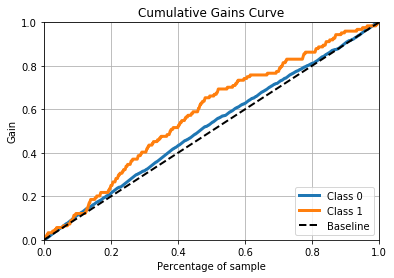

In [66]:
skplt.metrics.plot_cumulative_gain(y_test, bnb_2.predict_proba(X_test))
plt.show()

### Explaination: 
1. For the first parameter[0.9, 0.1], F1 score is very less(5.7%) in compare to F1 score(33%) of second parameter[0.1, 0.9].
2. Accuracy for second parameter is also very low( 29%) whereas accuracy for first parameter is 80%.
3. For the first parameter, sensitivity(recall/Total Positive rate) and specificity(selectivity/ Total Negative Rate) are 0.03 and 0.97 respectively whereas for second parameter sensitivity and specificity are 0.92 and 0.85 respectively. So, for the first parameter is a trade-off between senstivity and specificity.
4. Error rates for first and second parameters are 19% and 70% respectively.
5. In the given dataset, number of 0 > number of 1. For first parameter, TN value(526) is more than TN value(80) of second parameter and that's why first parameter is more accurate.
6. The first parameter is more concentrated on the class 0 samples whereas second parameter tends its concentration towards for class 1 samples.
7. Overall on the basis of accuracy rate, first parameter[0.9, 0.1] is better than the second parameter[ 0.1, 0.9] with higher accuracy rate and specificity and with lower error rate. 


